In [1]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

In [14]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '04201500'  # This code refers to the Rocky River near Berea OH

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2017-01-01', end='2022-02-18')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
2017-01-01 00:00:00+00:00,NaN,NaN,04201500,NaN,NaN,NaN,NaN,123.0,A
2017-01-02 00:00:00+00:00,NaN,NaN,04201500,NaN,NaN,NaN,NaN,107.0,A
2017-01-03 00:00:00+00:00,NaN,NaN,04201500,NaN,NaN,NaN,NaN,363.0,A
2017-01-04 00:00:00+00:00,NaN,NaN,04201500,NaN,NaN,NaN,NaN,1710.0,A
2017-01-05 00:00:00+00:00,NaN,NaN,04201500,NaN,NaN,NaN,NaN,549.0,A
...,...,...,...,...,...,...,...,...,...
2022-02-13 00:00:00+00:00,-999999.0,"P, Eqp",04201500,-999999.0,"P, Eqp",-999999.0,"P, Eqp",728.0,P
2022-02-14 00:00:00+00:00,-999999.0,"P, Eqp",04201500,-999999.0,"P, Eqp",-999999.0,"P, Eqp",451.0,P
2022-02-15 00:00:00+00:00,-999999.0,"P, Eqp",04201500,-999999.0,"P, Eqp",-999999.0,"P, Eqp",343.0,P


<AxesSubplot:xlabel='datetime'>

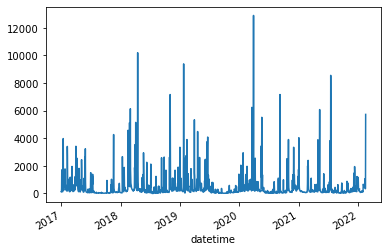

In [15]:
# Simple plot
df['00060_Mean'].plot()

# Question 1

### The plot above shows the mean daily discharge (in cubic feet per second) of the Rocky River in Berea OH for the last 5 years. Here we can see an intra-annual cycle where discharge regularly increases during the melt season (February-April).

# Question 2

#### Make an HTML table that contains the site name, site number and mean daily discharge between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for three rivers in the US.


In [72]:
# Specify the USGS site code
willamette = '14211720'  # WILLAMETTE RIVER AT EUGENE, OR
mississippi = '07032000' # MISSISSIPPI RIVER AT MEMPHIS, TN
detroit = '04165710' # DETROIT RIVER AT FORT WAYNE AT DETROIT, MI

# Get instantaneous values (iv)
wdf = nwis.get_record(sites=willamette, service='dv', start='2020-10-31', end='2021-09-30')
mdf = nwis.get_record(sites=mississippi, service='dv', start='2020-10-31', end='2021-09-30')
ddf = nwis.get_record(sites=detroit, service='dv', start='2020-10-31', end='2021-09-30')

In [75]:
wdf_mean_discharge = wdf['00060_Mean'].mean()
mdf_mean_discharge = mdf['00060_Mean'].mean()
ddf_mean_discharge = ddf['00060_Mean'].mean()

print("wdf = %.0f; mdf = %.0f; ddf = %.0f" % (wdf_mean_discharge,mdf_mean_discharge,ddf_mean_discharge))

wdf = 27817; mdf = 572510; ddf = 234536


<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Daily Discharge (between Oct 31, 2020 and Sep 30, 2021)</th>
  </tr>
  <tr>
    <td>WILLAMETTE RIVER AT EUGENE, OR</td>
    <td>14211720</td>
    <td>27817</td>
  </tr>
  <tr>
    <td>MISSISSIPPI RIVER AT MEMPHIS, TN</td>
    <td>07032000</td>
    <td>572510</td>
  </tr>
  <tr>
    <td>DETROIT RIVER AT FORT WAYNE AT DETROIT, MI</td>
    <td>04165710</td>
    <td>234536</td>
  </tr>    
</table>

In [77]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [78]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [79]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [80]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [92]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [90]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [84]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [85]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

In [86]:
# Get elevation value as a float
float(mountain_stats['Elevation'].iloc[0][:-2])

3428.8

In [87]:
# To get these data from every row, we can write another quick for loop
elevation = []
for i in range(len(mountain_stats)):
    elev = float(mountain_stats['Elevation'].iloc[i][:-2])
    elevation.append(elev)
elevation

[3428.8,
 3201.0,
 3158.5,
 3075.0,
 3064.0,
 3000.0,
 2968.0,
 2958.7,
 2950.0,
 2913.8,
 2895.0,
 2816.0,
 2799.4,
 2798.0,
 2777.0,
 2764.0,
 2756.1,
 2722.9,
 2666.4,
 2633.3,
 2575.8,
 2564.0,
 2553.3,
 2550.6,
 2503.83,
 2499.3,
 2482.0,
 2449.8,
 2450.0,
 2445.8,
 2435.0]

In [ ]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=elevation[i]).add_to(map)
map

# Question 3

#### Make a new map of the tallest mountains in Oregon but include a popup that displays the Isolation data as a float.

In [91]:
# Get isolation value as a float
float(mountain_stats['Isolation'].iloc[0][:-2])

92.2

In [94]:
# To get these data from every row, we can write another quick for loop
isolation = []
for r in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[r][:-2])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [95]:
# Create map of tallest mountains with isolation data popup
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

# Grad Student Question

#### Add a popup that includes the name of the mountain as a string (without any square brackets). 

In [127]:
import re

In [130]:
# Get string data from every row and remove square brackets + contents of square brackets
mount_name = []
for p in range(len(mountain_stats)):
    name = str(mountain_stats['Mountain peak'].iloc[p])
    name_fix = re.sub(r'\[.*?\]','',name, flags=re.DOTALL)
    mount_name.append(name_fix)
mount_name

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [131]:
# Create map of tallest mountains with corrected mountain name data popup
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=mount_name[i]).add_to(map)
map

In [132]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

  Using cached configparser-5.2.0-py3-none-any.whl (19 kB)
  Using cached crayons-0.4.0-py2.py3-none-any.whl (4.6 kB)


In [135]:
# Import packages
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.firefox import GeckoDriverManager

In [137]:
# Install Chrome webdriver
driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


In [138]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [139]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [147]:
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in c

# Question 4
#### Write a script to automatically derive the geographic coordinates for the following addresses and plot them on a folium map

In [149]:
address_list = ['1844 SW Morrison St, Portland, OR 97205',
                '800 Occidental Ave S, Seattle, WA 98134',
                '1001 Stadium Dr, Inglewood, CA 90301',
                '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [150]:
address_coords = []
# Loop through every ski resort to find it's coordinates
for name in address_list:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + name
    
    # Import web driver and search for ski resorts
    driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


====== WebDriver manager ======
Current firefox version is 97.0
Get LATEST geckodriver version for 97.0 firefox
Driver [/Users/lily/.wdm/drivers/geckodriver/macos/v0.30.0/geckodriver] found in cache


In [151]:
address_coords

[('45.5216813', '-122.693017'),
 ('47.5933137', '-122.3344609'),
 ('33.9530049', '-118.3407129'),
 ('44.0594325', '-123.0710918')]

In [153]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=address_list[i]).add_to(map)
map

In [348]:
# Import package
import xarray as xr

# Define filepath
fp = '/Users/lily/Documents/GitHub/geospatial-data-science/labs/lab7/data'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [349]:
xds['time']

<xarray.DataArray 'time' (time: 12)>
array(['2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Attributes:
    long_name:  time

# Question 5
#### Which ski resort received more snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

In [350]:
ski_resort_names

['Anthony Lakes (ski area)',
 'Mount Ashland Ski Area',
 'Cooper Spur ski area',
 'Ferguson Ridge Ski Area',
 'Hoodoo (ski area)',
 'Mount Ashland Ski Area Expansion',
 'Mount Bachelor ski area',
 'Mount Hood Meadows',
 'Mount Hood Skibowl',
 'Snow Bunny',
 'Spout Springs Ski Area',
 'Summit Pass (Oregon)',
 'Timberline Lodge ski area',
 'Warner Canyon',
 'Willamette Pass Resort']

In [351]:
# Get coords for the three ski resorts
ashland_coords = ski_resort_coords[1]
hoodoo_coords = ski_resort_coords[4]
willamette_coords = ski_resort_coords[14]

In [207]:
# Print out coordinates for reference
print(ashland_coords, hoodoo_coords,willamette_coords)

('42.081689', '-122.7069427') ('44.4086477', '-121.8736045') ('43.6000579', '-122.0387287')


In [208]:
# Select location in dataset nearest to ski resort location
ashland = xds.sel(longitude=[-122.7069427], latitude=[42.081689], method="nearest")
hoodoo = xds.sel(longitude=[-121.8736045], latitude=[44.4086477], method="nearest")
willamette = xds.sel(longitude=[-122.0387287], latitude=[43.6000579], method="nearest")

In [238]:
# Calculate sums for each nearest location
ashland_snow = ashland['sf'].sum()
hoodoo_snow = hoodoo['sf'].sum()
willamette_snow = willamette['sf'].sum()

In [352]:
ashland_snow.values

array(0.00922862, dtype=float32)

In [353]:
hoodoo_snow.values

array(0.01859693, dtype=float32)

In [354]:
willamette_snow.values

array(0.01963694, dtype=float32)

### Willamette Pass Resort received the most snowfall (m of water equivalent) in 2020.

# Grad Student Question 2
#### Rank the ski resorts by:
#### a) Average snowfall in November
#### b) Average snowfall in Spring (i.e. March, April, and May)
#### c )Interannual variability in snowfall


In [355]:
import datetime

# Define filepath
fp = '/Users/lily/Documents/GitHub/geospatial-data-science/labs/lab7/data'

# Read data
xds_long = xr.open_dataset(fp + '/era_monthly_snowfall_1979_2020.nc', decode_coords='all')

In [356]:
ski_resort_coords

[('44.9629273', '-118.2357129'),
 ('42.081689', '-122.7069427'),
 ('45.4188609', '-121.6064525'),
 ('45.2816889', '-117.1148305'),
 ('44.4086477', '-121.8736045'),
 ('42.081689', '-122.7069427'),
 ('44.0028975', '-121.6812601'),
 ('45.331759', '-121.6673735'),
 ('45.2943644', '-121.7896261'),
 ('45.2871456', '-121.7312302'),
 ('45.7552462', '-118.0536097'),
 ('44.0304622', '-123.4893634'),
 ('45.3311319', '-121.7131951'),
 ('42.237378', '-120.2968271'),
 ('43.6000579', '-122.0387287')]

In [357]:
# Create list of tuple integers of coordinates
ski_coord_ints = []
for tuple in ski_resort_coords:
    temp = []
    for x in tuple:
        if x.isalpha():
            temp.append(x)
        elif x.isdigit():
            temp.append(int(x))
        else:
            temp.append(float(x))
    ski_coord_ints.append((temp[0],temp[1]))
print(ski_coord_ints)

[(44.9629273, -118.2357129), (42.081689, -122.7069427), (45.4188609, -121.6064525), (45.2816889, -117.1148305), (44.4086477, -121.8736045), (42.081689, -122.7069427), (44.0028975, -121.6812601), (45.331759, -121.6673735), (45.2943644, -121.7896261), (45.2871456, -121.7312302), (45.7552462, -118.0536097), (44.0304622, -123.4893634), (45.3311319, -121.7131951), (42.237378, -120.2968271), (43.6000579, -122.0387287)]


In [358]:
# Create separate lists of ski resort coordinate latitudes and longitudes
ski_resort_lats, ski_resort_longs = zip(*ski_coord_ints)
resort_lats_list = list(ski_resort_lats)
resort_longs_list = list(ski_resort_longs)

In [359]:
# Create a new Dataset containing only November values
novembers = xds_long.isel(time=(xds_long.time.dt.month == 11))
novembers

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 42)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 1979-11-01 1980-11-01 ... 2020-11-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:07:38 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [360]:
# Calculate mean snowfall value across all novembers at the nearest location to each coordinate pair
november_snows = []
for i in range(len(ski_resort_coords)):
    ski_resort = novembers.sel(longitude=[resort_longs_list[i]], latitude=[resort_lats_list[i]], method="nearest")
    resort_snow_november = ski_resort['sf'].mean()
    november_snows.append(resort_snow_november.values)

In [361]:
# Create dictionary pairing ski resort name to average november snowfall value
november_snow_dict = {}
# Convert to dictionary
for key in ski_resort_names:
   for value in november_snows:
      november_snow_dict[key] = value
      november_snows.remove(value)
      break
november_snow_dict

{'Anthony Lakes (ski area)': array(0.00186159, dtype=float32),
 'Mount Ashland Ski Area': array(0.0016192, dtype=float32),
 'Cooper Spur ski area': array(0.0016262, dtype=float32),
 'Ferguson Ridge Ski Area': array(0.00224436, dtype=float32),
 'Hoodoo (ski area)': array(0.00251084, dtype=float32),
 'Mount Ashland Ski Area Expansion': array(0.0016192, dtype=float32),
 'Mount Bachelor ski area': array(0.00325813, dtype=float32),
 'Mount Hood Meadows': array(0.00220338, dtype=float32),
 'Mount Hood Skibowl': array(0.00220338, dtype=float32),
 'Snow Bunny': array(0.00220338, dtype=float32),
 'Spout Springs Ski Area': array(0.00156591, dtype=float32),
 'Summit Pass (Oregon)': array(5.0190392e-05, dtype=float32),
 'Timberline Lodge ski area': array(0.00220338, dtype=float32),
 'Warner Canyon': array(0.00130316, dtype=float32),
 'Willamette Pass Resort': array(0.00286093, dtype=float32)}

### Ski Resorts Ranked by Average snowfall (m in water equivalent) in November
1. Mount Bachelor ski area: 0.00325813
2. Willamette Pass Resort: 0.00286093
3. Hoodoo (ski area): 0.00251084
4. Ferguson Ridge Ski Area: 0.00224436
5. Mount Hood Meadows: 0.00220338
6. Mount Hood Skibowl: 0.00220338
7. Snow Bunny: 0.00220338
8. Timberline Lodge ski area: 0.00220338
9. Anthony Lakes (ski area): 0.00186159
10. Mount Ashland Ski Area: 0.0016192
11. Mount Ashland Ski Area Expansion: 0.0016192
12. Cooper Spur ski area: 0.0016262
13. Spout Springs Ski Area: 0.00156591
14. Warner Canyon: 0.00130316
15. Summit Pass (Oregon): 5.0190392e-05

### b) Average snowfall in Spring (i.e. March, April, and May)

In [362]:
# Create a new Dataset containing only Spring values
springs = xds_long.isel(time=(xds_long.time.dt.season == "MAM"))
springs

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 126)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 1979-03-01 1979-04-01 ... 2020-05-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:07:38 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [363]:
# Calculate mean snowfall value across all springs at the nearest location to each coordinate pair
spring_snows = []
for i in range(len(ski_resort_coords)):
    ski_resort = springs.sel(longitude=[resort_longs_list[i]], latitude=[resort_lats_list[i]], method="nearest")
    resort_snow_spring = ski_resort['sf'].mean()
    spring_snows.append(resort_snow_spring.values)

In [364]:
# Create dictionary pairing ski resort name to average spring snowfall value
spring_snow_dict = {}
# Convert to dictionary
for key in ski_resort_names:
   for value in spring_snows:
      spring_snow_dict[key] = value
      spring_snows.remove(value)
      break
spring_snow_dict

{'Anthony Lakes (ski area)': array(0.00110986, dtype=float32),
 'Mount Ashland Ski Area': array(0.00102258, dtype=float32),
 'Cooper Spur ski area': array(0.00081359, dtype=float32),
 'Ferguson Ridge Ski Area': array(0.00153634, dtype=float32),
 'Hoodoo (ski area)': array(0.00152509, dtype=float32),
 'Mount Ashland Ski Area Expansion': array(0.00102258, dtype=float32),
 'Mount Bachelor ski area': array(0.0020058, dtype=float32),
 'Mount Hood Meadows': array(0.0014855, dtype=float32),
 'Mount Hood Skibowl': array(0.0014855, dtype=float32),
 'Snow Bunny': array(0.0014855, dtype=float32),
 'Spout Springs Ski Area': array(0.00070196, dtype=float32),
 'Summit Pass (Oregon)': array(6.345044e-05, dtype=float32),
 'Timberline Lodge ski area': array(0.0014855, dtype=float32),
 'Warner Canyon': array(0.00084139, dtype=float32),
 'Willamette Pass Resort': array(0.00175876, dtype=float32)}

### Ski Resorts Ranked by Average snowfall (m in water equivalent) in Spring
1. Willamette Pass Resort: 0.00175876
2. Ferguson Ridge Ski Area: 0.00153634
3. Hoodoo (ski area): 0.00152509
4. Mount Hood Meadows: 0.0014855
5. Mount Hood Skibowl: 0.0014855
6. Snow Bunny: 0.0014855
7. Timberline Lodge ski area: 0.0014855
8. Anthony Lakes (ski area): 0.00110986
9. Mount Ashland Ski Area: 0.00102258
10. Mount Ashland Ski Area Expansion: 0.00102258
11. Cooper Spur ski area: 0.00081359
12. Warner Canyon: 0.00084139
13. Spout Springs Ski Area: 0.00070196
14. Mount Bachelor ski area: 0.0020058
15. Summit Pass (Oregon): 6.345044e-05

### c )Interannual variability in snowfall

In [365]:
xds_long

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 504)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:07:38 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [366]:
# Group dataset by year and sum each year
annual_sums = xds_long.groupby("time.year").sum()
annual_sums

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, year: 42)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * year       (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Data variables:
    sf         (year, latitude, longitude) float32 -1.118e-08 ... 0.003655

In [368]:
# Calculate variance across annual snowfall sums at the nearest location to each coordinate pair
snow_variances = []
for i in range(len(ski_resort_coords)):
    ski_resort = annual_sums.sel(longitude=[resort_longs_list[i]], latitude=[resort_lats_list[i]], method="nearest")
    resort_snow_variance = ski_resort['sf'].var()
    snow_variances.append(resort_snow_variance.values)

In [369]:
# Create dictionary pairing ski resort name to average spring snowfall value
snow_variance_dict = {}
# Convert to dictionary
for key in ski_resort_names:
   for value in snow_variances:
      snow_variance_dict[key] = value
      snow_variances.remove(value)
      break
snow_variance_dict

{'Anthony Lakes (ski area)': array(5.2860837e-06, dtype=float32),
 'Mount Ashland Ski Area': array(1.4122033e-05, dtype=float32),
 'Cooper Spur ski area': array(8.515051e-06, dtype=float32),
 'Ferguson Ridge Ski Area': array(9.959952e-06, dtype=float32),
 'Hoodoo (ski area)': array(1.7184255e-05, dtype=float32),
 'Mount Ashland Ski Area Expansion': array(1.4122033e-05, dtype=float32),
 'Mount Bachelor ski area': array(2.3064722e-05, dtype=float32),
 'Mount Hood Meadows': array(1.5404597e-05, dtype=float32),
 'Mount Hood Skibowl': array(1.5404597e-05, dtype=float32),
 'Snow Bunny': array(1.5404597e-05, dtype=float32),
 'Spout Springs Ski Area': array(4.885678e-06, dtype=float32),
 'Summit Pass (Oregon)': array(8.8411645e-07, dtype=float32),
 'Timberline Lodge ski area': array(1.5404597e-05, dtype=float32),
 'Warner Canyon': array(5.5629016e-06, dtype=float32),
 'Willamette Pass Resort': array(1.8924553e-05, dtype=float32)}

### Ski Resorts Ranked by Interannual snowfall variability (m in water equivalent)
1. Mount Bachelor ski area: 2.3064722e-05
2. Willamette Pass Resort: 1.8924553e-05
3. Hoodoo (ski area): 1.7184255e-05
4. Mount Hood Meadows: 1.5404597e-05
5. Mount Hood Skibowl: 1.5404597e-05
6. Snow Bunny: 1.5404597e-05
7. Timberline Lodge ski area: 1.5404597e-05
8. Mount Ashland Ski Area: 1.4122033e-05
9. Mount Ashland Ski Area Expansion: 1.4122033e-05
10. Ferguson Ridge Ski Area: 9.959952e-06
11. Cooper Spur ski area: 8.515051e-06
12. Warner Canyon: 5.5629016e-06
13. Anthony Lakes (ski area): 5.2860837e-06
14. Spout Springs Ski Area: 4.885678e-06
15. Summit Pass (Oregon): 8.8411645e-07